In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [109]:
matplotlib.rcParams['axes.unicode_minus'] = False 

In [110]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [111]:
orders=pd.read_csv('./data/orders.csv')

In [112]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [113]:
opp=pd.read_csv('./data/order_products__prior.csv')

In [114]:
opp.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [115]:
opt=pd.read_csv('./data/order_products__train.csv')

In [116]:
opt.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [117]:
order_info = pd.concat([opt, opp], axis=0)

In [118]:
order_info.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [119]:
df=order_info.drop('add_to_cart_order', axis=1)

In [120]:
df.head()

,order_id,product_id,reordered
0,1,49302,1
1,1,11109,1
2,1,10246,0
3,1,49683,0
4,1,43633,1


In [121]:
# productid별로 재구매된 상품
import numpy as np
dt=df.groupby(['product_id','reordered']).count().reset_index()

In [122]:
dt.head()

,product_id,reordered,order_id
0,1,0,743
1,1,1,1185
2,2,0,81
3,2,1,13
4,3,0,74


In [56]:
# 첫구매 상품과 재구매 상품 분류 
# 첫구매 상품 : 0인것의 갯수 세기
# 재구매 상품 : 1인것의 갯수 세기
comparison=pd.DataFrame(data=dt[dt['reordered']==0]['product_id'], columns=['product_id'])

In [57]:
comparison.head()

,product_id
0,1
2,2
4,3
6,4
8,5


In [66]:
# reorder=0인것들만 추출
comparison=pd.merge( comparison, dt[dt['reordered']==0])

In [68]:
comparison.drop('reordered', axis=1, inplace=True)

In [73]:
comparison.head()

,product_id,order_id
0,1,743
1,2,81
2,3,74
3,4,190
4,5,6


In [76]:
comparison.rename(columns={'order_id': 'first_order_count'}, inplace=True)

In [77]:
comparison.head()

,product_id,first_order_count
0,1,743
1,2,81
2,3,74
3,4,190
4,5,6


In [78]:
comparison= pd.merge(comparison,dt[dt['reordered']==1] )

In [80]:
comparison.drop('reordered', axis=1, inplace=True)

In [81]:
comparison.head()

,product_id,first_order_count,order_id
0,1,743,1185
1,2,81,13
2,3,74,209
3,4,190,161
4,5,6,10


In [82]:
comparison.rename(columns={'order_id': 'reorder_count'}, inplace=True)

In [123]:
comparison.head()

,product_id,first_order_count,reorder_count
0,1,743,1185
1,2,81,13
2,3,74,209
3,4,190,161
4,5,6,10


In [126]:
comparison.sort_values(by='reorder_count', ascending=False).head(10)

,product_id,first_order_count,reorder_count
22832,24852,76125,415166
12083,13176,65655,329275
19415,21137,61129,214448
20110,21903,56766,194939
43334,47209,44704,176173
43838,47766,43954,140270
25585,27845,24129,118684
43715,47626,48614,112178
25695,27966,32915,109688
15426,16797,44857,104588


In [44]:
df.to_csv("regressionex.csv", header=True)

## 데이터의 분포 보기
- 회귀분석은 연속형 데이터일때만 가능함
- 산점도 통해서 봐보기

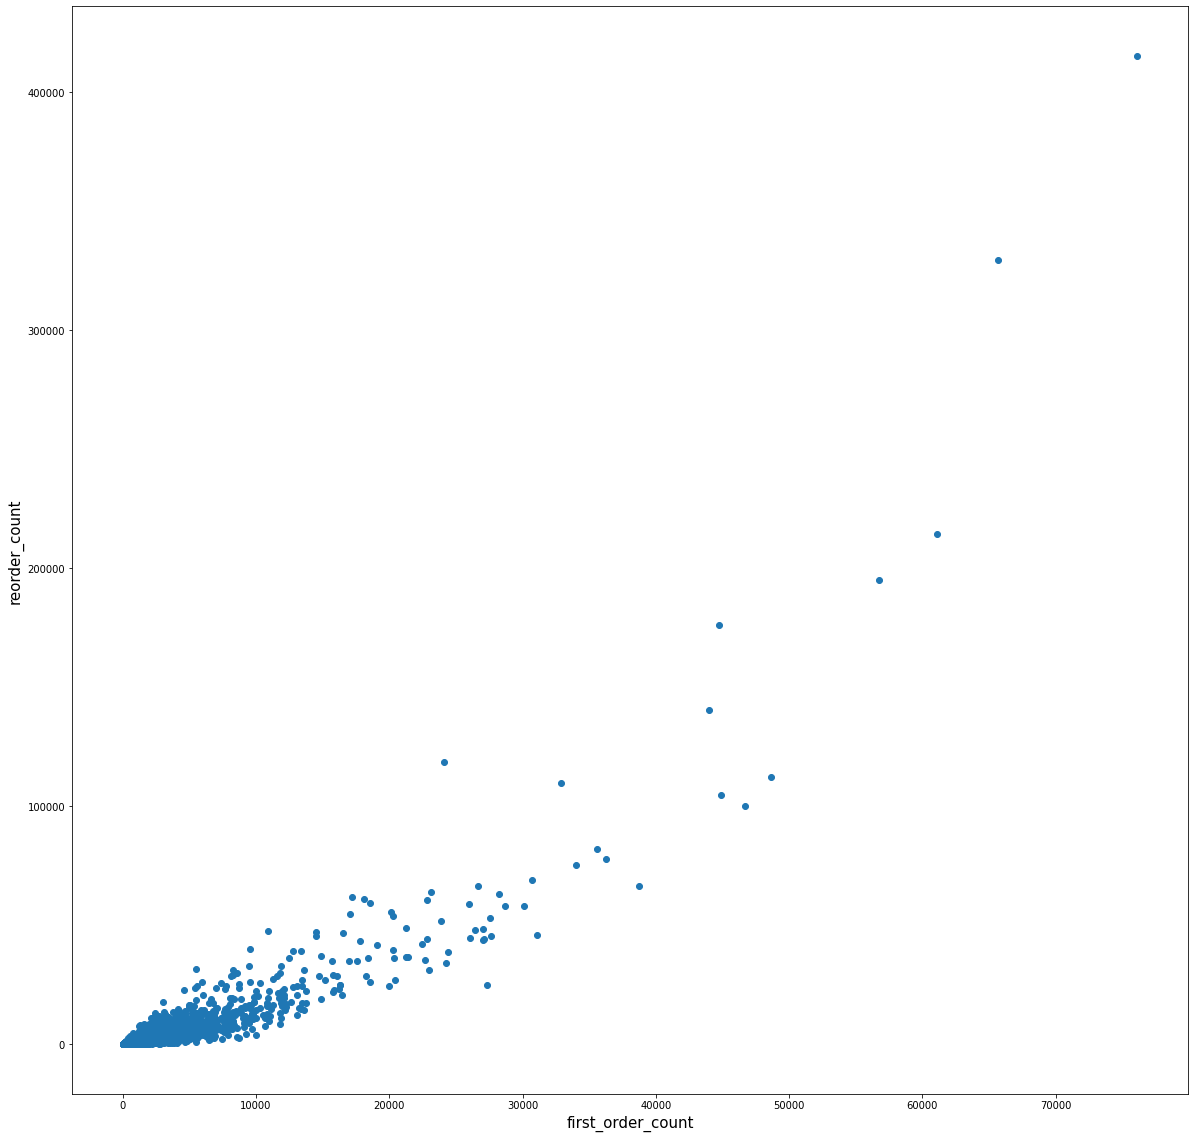

In [94]:
## 시각화
fig = plt.figure(figsize=(20,20))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(comparison['first_order_count'],comparison['reorder_count']) ## 원 데이터 산포도
 
plt.xlabel('first_order_count', fontsize=font_size)
plt.ylabel('reorder_count',fontsize=font_size)
plt.savefig('hypo6.png')

In [89]:
## states model 사용
fit = ols('reorder_count ~ first_order_count',data=comparison).fit() ## 단순선형회귀모형 적합

In [90]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          reorder_count   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 1.523e+05
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:31:07   Log-Likelihood:            -4.0850e+05
No. Observations:               45603   AIC:                         8.170e+05
Df Residuals:                   45601   BIC:                         8.170e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -298.5275      9.002    -33.163      0.000    -316.171    -280.884
first_order_count     2.4265      0.006    390.235      0.000       2.414       2.439
==============================================================================
Omnibus:                   152027.167   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      82648721878.721
Skew:                          58.554   Prob(JB):                         0.00
Kurtosis:                    6597.145   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Result
1. R-squared=0.770으로 회귀 모형의 설명력이 77%가 됨
2. F= 152300, 이때의 유의확률은 (Pr>F)=0.000으로 통계적으로 유의한 모형임을 알 수 있다.
3. Intercept의 t값이 -33.163, P>|t|=0.000이므로 회귀모형의 절편값은 유의하다
3. first_order_count의 t값은 390.235, P>|t|=0.000이므로 first_order_count변수도 유의하므로
first_order_count의 계수는 2.4265이 됌

#### 따라서, 이 회귀 모형의 식은 y(i)= -298.5275+2.4265*'first_order_count'


In [95]:
fit.params.Intercept

-298.5274875738236

In [97]:
fit.params.first_order_count

2.426481795397633

In [99]:
fit.predict(exog=dict(first_order_count=[500]))

0    914.71341
dtype: float64

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['Lot_size'],df['Work_hours']) ## 원 데이터 산포도
plt.plot(df['Lot_size'],fit.fittedvalues,color='red') ## 회귀직선 추가
 
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours',fontsize=font_size)
plt.show()

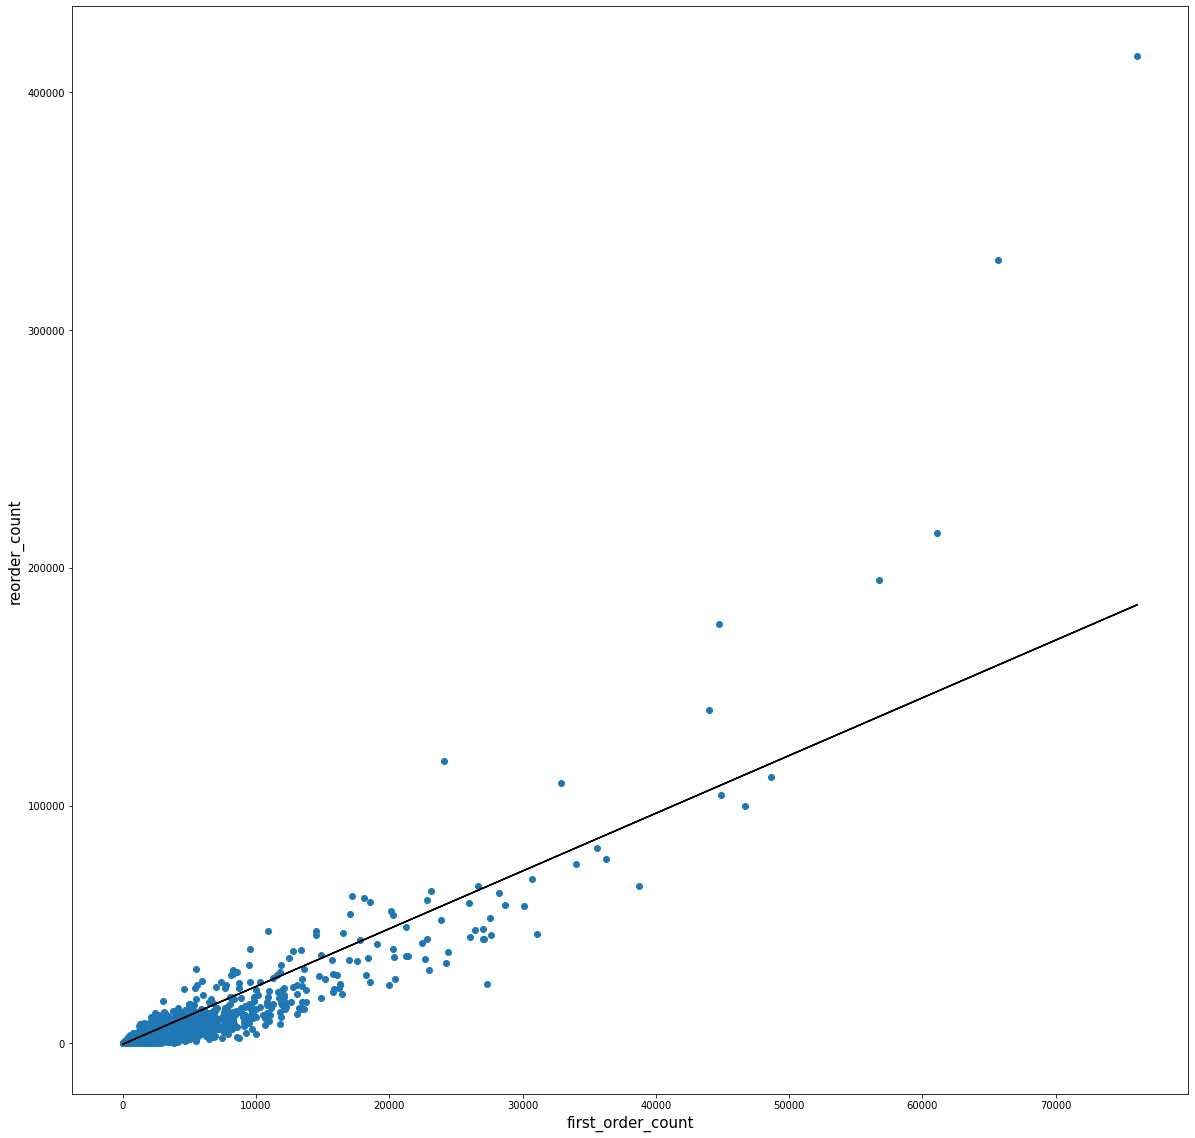

In [101]:
## 시각화
fig = plt.figure(figsize=(20,20))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(comparison['first_order_count'],comparison['reorder_count']) ## 원 데이터 산포도
plt.plot(comparison['first_order_count'],fit.fittedvalues,color='black') ## 회귀직선 추가
 
plt.xlabel('first_order_count', fontsize=font_size)
plt.ylabel('reorder_count', fontsize=font_size)
plt.savefig('hypo7.png')

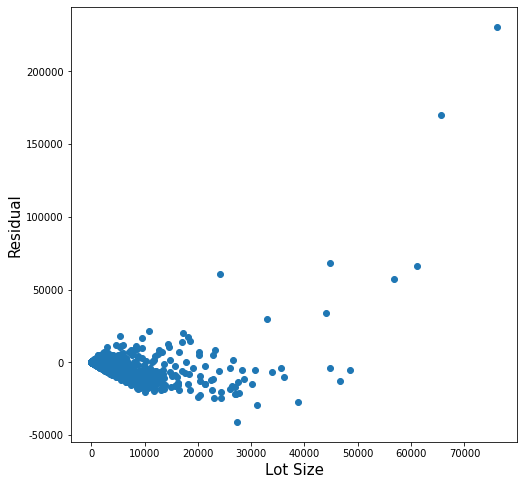

In [102]:
## 잔차도 Residual Plot
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
 
plt.scatter(comparison['first_order_count'],fit.resid) ## 잔차도 출력
 
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Residual', fontsize=font_size)
plt.show()